# Data Analysis Project

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In this notebook, I will be using three CSV files:


* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*

* **movies.csv :** *movieId*, *title*, *genres*

In [2]:
movies = pd.read_csv('./movielens/movies.csv',delimiter=',')
ratings = pd.read_csv('./movielens/ratings.csv', delimiter=',')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


### Data Cleaning

In [5]:
movies.shape, ratings.shape

((9125, 3), (100004, 4))

In [6]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [7]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

### Descriptive Statistics

In [8]:
ratings['rating'].describe()

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [10]:
ratings.corr()

,userId,movieId,rating,timestamp
userId,1.000000,0.007126,0.010467,-0.035072
movieId,0.007126,1.000000,-0.028894,0.514742
rating,0.010467,-0.028894,1.000000,-0.038996
timestamp,-0.035072,0.514742,-0.038996,1.000000


### Checking if rating is not less than 0 and more than 5

In [11]:
filter = ratings['rating'] > 5
filter.any()

False

In [12]:
filter2 = ratings['rating'] < 0
filter.any()

False

### Data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026E3D51D6D8>]],
      dtype=object)

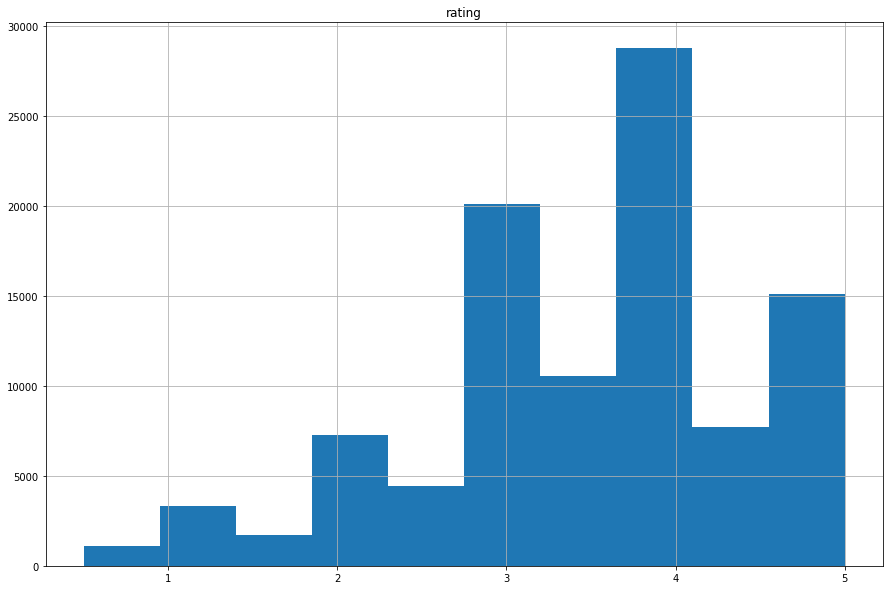

In [13]:
%matplotlib inline 
ratings.hist(column='rating', figsize=(15,10))

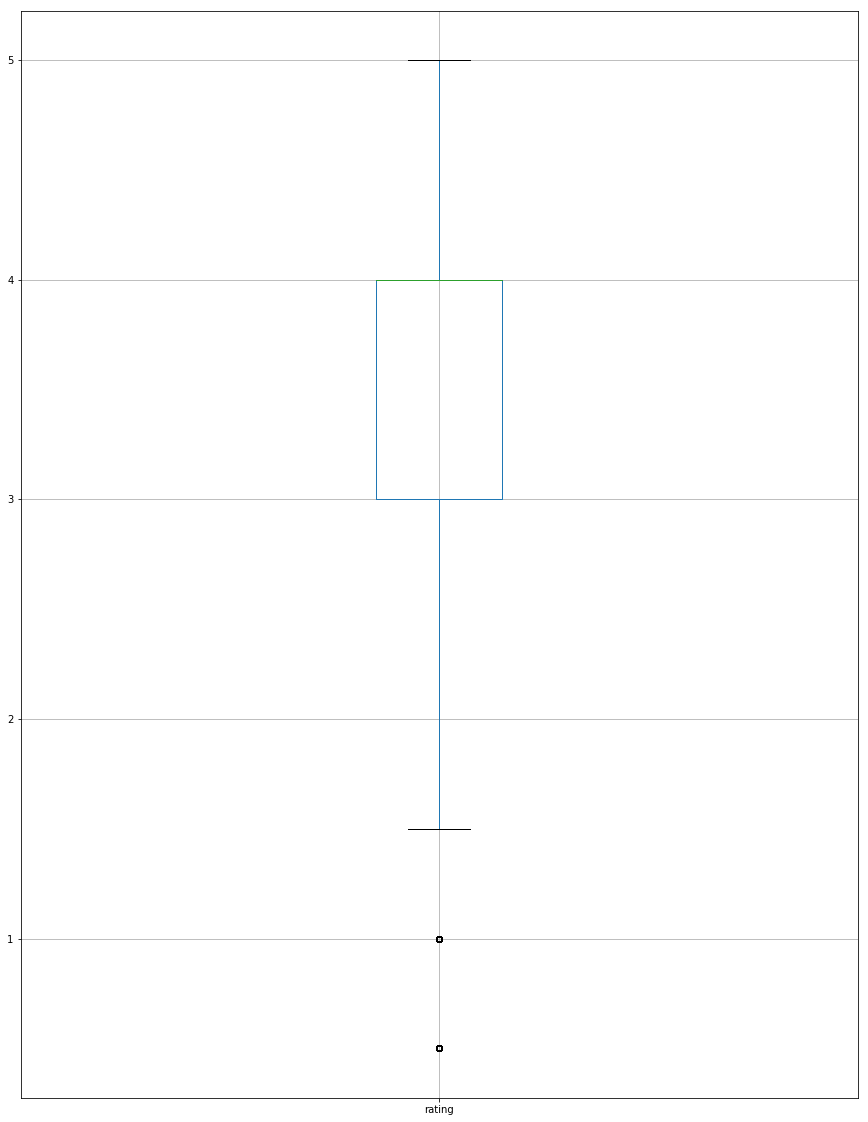

In [14]:
ratings.boxplot(column='rating', figsize=(15,20))

### Making copy of rating dataset

In [15]:
copy_ratings = ratings[['movieId', 'rating']].copy()

### Taking Average of each Movie 

In [16]:
avg_ratings = copy_ratings.groupby('movieId', as_index=False).mean()

In [17]:
avg_ratings.shape

(9066, 2)

### Spliting the genres

In [18]:
movies['genres'] = movies['genres'].str.split('|').str.join(',')

In [19]:
movies = movies.merge(avg_ratings, how='inner', on='movieId')
movies.shape
movies.isnull().any()

movieId    False
title      False
genres     False
rating     False
dtype: bool

In [20]:
(movies[movies.genres.iloc[:] == '(no genres listed)']) = np.nan
movies.isnull().any()
movies = movies.dropna()
movies.isnull().any()

movieId    False
title      False
genres     False
rating     False
dtype: bool

In [21]:
movies.shape

(9049, 4)

### Unique genres

In [22]:
genres = movies.genres.copy()
genres = genres.str.split(',', expand=True)
total_genres = genres[0].unique()
total_genres = pd.Series(total_genres)
total_genres = total_genres.dropna()
total_genres

0       Adventure
1          Comedy
2          Action
3           Drama
4           Crime
5        Children
6         Mystery
7     Documentary
8       Animation
9        Thriller
10         Horror
11        Fantasy
12      Film-Noir
13        Western
14        Romance
15         Sci-Fi
16        Musical
17            War
dtype: object

### Counting the Reviews given by particular user

In [23]:
users = ratings['userId'].value_counts()
users = pd.DataFrame(users)
users = users.sort_index().reset_index()
users.columns = ['userId', 'count']
users.head()

,userId,count
0,1,20
1,2,76
2,3,51
3,4,204
4,5,100


In [24]:
"""Function for finding the particular movieid for given genres"""
# def find_genres(genres):
#     film = []
#     index = 0
#     for i in movies.genres.str.strip().str.split(','):
#         for genre in i:
#             if genre == genres:
#                 film.append(index)
#         index +=1
#     return film
    
# for i in movies.genres.str.contains("Adventure"):
#     print(movies.movieId)
# def find_genres1(genres):
#     return movies.movieId[movies.genres.str.contains("Adventure")]


'Function for finding the particular movieid for given genres'

In [25]:
names = ['Adventure_movie', 'Comedy_movie', 'Action_movie', 'Drama_movie', 'Crime_movie', \
         'Children_movie','Mystery_movie', 'Documentary_movie', 'Animation_movie', \
         'Thriller_movie', 'Horror_movie','Fantasy_movie', 'Film_Noir_movie', 'Western_movie',\
         'Romance_movie', 'Sci_Fi_movie', 'Musical_movie','War_movie']

### Function gives the list of names of the movies in particular genres and creating dataframe for different genres

In [26]:
def genres_avg():
    g = {}
    for i in total_genres:
        g[i] = movies.movieId[movies.genres.str.contains(i)].values

    return g

### Function gives the list of names of the movies in particular genres and creating dataframe for different genres

In [27]:
adv = genres_avg()

In [28]:
adv = genres_avg()
def naming_series():
    for dick, name in zip(adv, names):
            globals()[name] = pd.DataFrame(pd.Series(adv[dick]),columns=['movieId'])  # globals makes the variables in loops

naming_series()

### Function merge df_movies and movies 

In [29]:
df_movies = [Adventure_movie, Comedy_movie, Action_movie, Drama_movie, Crime_movie, \
         Children_movie,Mystery_movie, Documentary_movie, Animation_movie, \
         Thriller_movie, Horror_movie,Fantasy_movie, Film_Noir_movie, Western_movie,\
         Romance_movie, Sci_Fi_movie, Musical_movie,War_movie]
def merger(dataseries, names):
    for i, name in zip(dataseries, names):
        globals()[name] = movies.merge(i, on='movieId', how='inner')
merger(df_movies, names)

## Getting the information of each genres

In [30]:
mean_of_genres = pd.DataFrame()
df_movies = [Adventure_movie, Comedy_movie, Action_movie, Drama_movie, Crime_movie, \
         Children_movie,Mystery_movie, Documentary_movie, Animation_movie, \
         Thriller_movie, Horror_movie,Fantasy_movie, Film_Noir_movie, Western_movie,\
         Romance_movie, Sci_Fi_movie, Musical_movie,War_movie]
for i,name in zip(df_movies,total_genres):
    mean_of_genres[name] = i['rating'].describe()

mean_of_genres


,Adventure,Comedy,Action,Drama,Crime,Children,Mystery,Documentary,Animation,Thriller,Horror,Fantasy,Film-Noir,Western,Romance,Sci-Fi,Musical,War
count,1116.000000,3307.000000,1543.000000,4328.000000,1092.000000,582.000000,537.000000,487.000000,447.000000,1717.000000,872.000000,653.000000,121.000000,168.000000,1541.000000,791.000000,394.000000,366.000000
mean,3.229862,3.190353,3.090863,3.447417,3.301617,3.138675,3.383182,3.686744,3.418974,3.183073,2.991933,3.183827,3.669072,3.421001,3.344588,3.167052,3.334025,3.534021
std,0.809380,0.891052,0.850966,0.823185,0.852795,0.848254,0.777867,0.833508,0.820935,0.818853,0.911257,0.882802,0.652434,0.760113,0.827895,0.813392,0.847645,0.844513
min,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000
25%,2.751659,2.666667,2.512500,3.000000,2.888889,2.684441,3.000000,3.250000,3.000000,2.750000,2.500000,2.727273,3.500000,3.000000,3.000000,2.698214,3.000000,3.000000
50%,3.357143,3.273585,3.187500,3.500000,3.500000,3.271408,3.500000,3.937500,3.500000,3.300000,3.000000,3.284810,3.750000,3.500000,3.500000,3.250000,3.500000,3.674424
75%,3.774107,3.817477,3.676945,4.000000,3.947069,3.687194,3.937500,4.211111,4.000000,3.750000,3.541667,3.777778,4.000000,4.000000,3.928571,3.750000,3.879464,4.016304
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
